In [122]:
import csv
import datetime

import numpy as np
import statsmodels.nonparametric.smoothers_lowess
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches

In [4]:
with open('data.csv') as f:
    reader = csv.DictReader(f)
    lines = [line for line in reader]

In [5]:
lines[0]

OrderedDict([('date', '2020-01-22'),
             ('cases', '1'),
             ('deaths', '0'),
             ('new_cases', '0'),
             ('new_deaths', '0'),
             ('day', 'Wednesday')])

In [107]:
date = [line['date'] for line in lines]
new_cases = [int(line['new_cases']) for line in lines]
new_deaths = [int(line['new_deaths']) for line in lines]
days = [line['day'] for line in lines]

In [8]:
new_deaths.index(1)

38

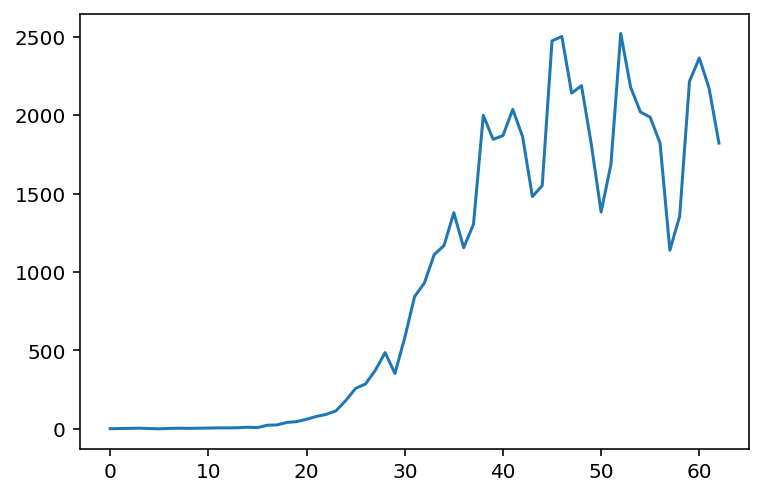

In [10]:
plt.plot(new_deaths[38:])

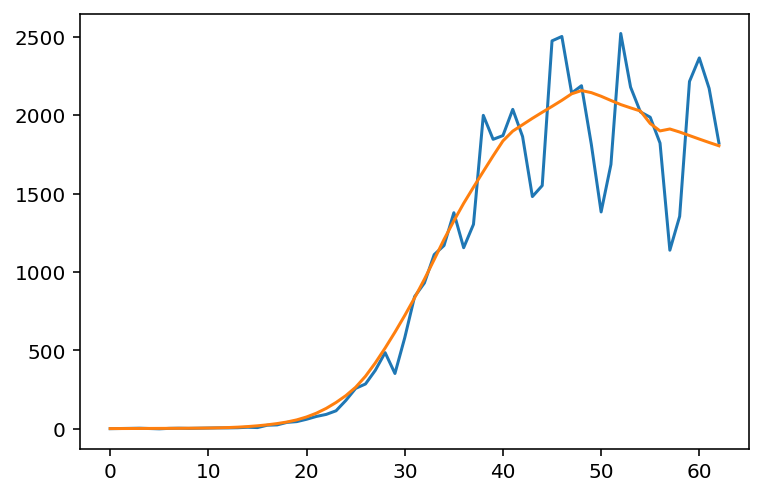

In [42]:
def lowess(values):
    """Smoothed values, assuming equally spaced over time"""
    endog = np.array(values)
    num_values = len(endog)
    exog = np.arange(num_values)
    frac = 14 / num_values
    out = statsmodels.nonparametric.smoothers_lowess.lowess(
        endog, exog, frac=frac, is_sorted=True, return_sorted=False)
    return out

estimates = lowess(new_deaths[38:])
_ = plt.plot(list(zip(new_deaths[38:], estimates)))

In [111]:
days[-1]

'Friday'

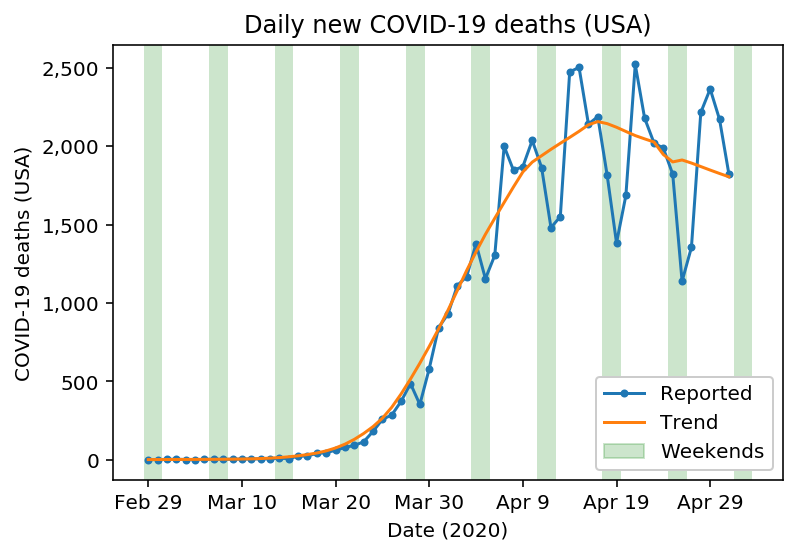

In [171]:
death_counts, = plt.plot(new_deaths[38:], '.-', label='Reported')
death_smooth, = plt.plot(estimates, label='Trend')
locs, labels = plt.xticks()
locs = locs[1:-1]
labels = [datetime.datetime.strptime(date[38:][int(loc)],'%Y-%m-%d').strftime('%b %-d')
          for loc in locs]
_ = plt.xticks(locs, labels)

for index, day in enumerate(days[38:]):
    if day == 'Saturday':
        plt.axvspan(index - 0.5, index + 1.5, facecolor='g', alpha=0.2)
if day == 'Friday':
    plt.axvspan(index + 0.5, index + 2.5, facecolor='g', alpha=0.2)

plt.gca().set_yticklabels(['{:,}'.format(int(x)) for x in plt.gca().get_yticks().tolist()])
_ = plt.title('Daily new COVID-19 deaths (USA)')
green_patch = matplotlib.patches.Patch(color='g', alpha=0.2, label='Weekends')
_ = plt.legend(handles=[death_counts, death_smooth, green_patch],
               loc='lower right', framealpha=1)
_ = plt.xlabel('Date (2020)')
_ = plt.ylabel('COVID-19 deaths (USA)')
plt.savefig('data_and_trend.png', facecolor='w', transparent=False, dpi=300)

In [101]:
[date[38:][int(loc)] for loc in locs]

['2020-02-29',
 '2020-03-10',
 '2020-03-20',
 '2020-03-30',
 '2020-04-09',
 '2020-04-19',
 '2020-04-29']

In [98]:
labels

['Feb 2', 'Mar 3', 'Mar 3', 'Mar 3', 'Apr 4', 'Apr 4', 'Apr 4']

In [46]:
deaths_data = list(zip(date, day[38:], estimates, new_deaths[38:]))
deaths_data = [list(line) + [line[3] - line[2]] for line in deaths_data]
deaths_data

[['2020-01-22', 'Saturday', 1.6547936401019747, 1, -0.6547936401019747],
 ['2020-01-23', 'Sunday', 1.854971116318917, 2, 0.1450288836810829],
 ['2020-01-24', 'Monday', 2.065901720792543, 3, 0.9340982792074568],
 ['2020-01-25', 'Tuesday', 2.295303279753172, 4, 1.7046967202468282],
 ['2020-01-26', 'Wednesday', 2.545746014465865, 2, -0.5457460144658648],
 ['2020-01-27', 'Thursday', 2.8053842778307194, 0, -2.8053842778307194],
 ['2020-01-28', 'Friday', 3.0359113141151615, 3, -0.03591131411516146],
 ['2020-01-29', 'Saturday', 3.3696261164908714, 4, 0.6303738835091286],
 ['2020-01-30', 'Sunday', 3.809948890796492, 3, -0.809948890796492],
 ['2020-01-31', 'Monday', 4.411934508752176, 4, -0.41193450875217597],
 ['2020-02-01', 'Tuesday', 5.211583976698497, 5, -0.21158397669849727],
 ['2020-02-02', 'Wednesday', 6.385061247610502, 6, -0.3850612476105022],
 ['2020-02-03', 'Thursday', 8.138760854472908, 6, -2.138760854472908],
 ['2020-02-04', 'Friday', 10.77270445527128, 7, -3.7727044552712794],
 ['

In [48]:
day_diffs = {}
for line in deaths_data:
    day_diffs.setdefault(line[1], []).append(line[4])

In [49]:
day_diffs

{'Saturday': [-0.6547936401019747,
  0.6303738835091286,
  -4.442735709575812,
  -20.862167555839847,
  -29.0869521861664,
  51.904196212662555,
  -75.29199784529419,
  -328.8679102571027,
  -77.64204584426125],
 'Sunday': [0.1450288836810829,
  -0.809948890796492,
  -11.309025354700193,
  -38.438720892775734,
  -263.20313854520987,
  -282.9337272582982,
  -498.9553318010794,
  -737.72482757846,
  -773.0454457092055],
 'Monday': [0.9340982792074568,
  -0.41193450875217597,
  -2.5982695737436146,
  -52.937559552960096,
  -141.88039916001003,
  -236.73730187740261,
  -467.46216578385133,
  -407.8312219108893,
  -537.5101942795195],
 'Tuesday': [1.7046967202468282,
  -0.21158397669849727,
  -8.512126432547738,
  -30.74259571186741,
  7.963136716966801,
  357.8061771258483,
  417.8836815926106,
  453.3419785757292,
  344.8833563217536],
 'Wednesday': [-0.5457460144658648,
  -0.3850612476105022,
  -2.539766210459824,
  -7.235284018008599,
  -23.732129841949245,
  105.5090037947266,
  407.19

In [50]:
for day, vals in day_diffs.items():
    print(day, sum(vals) / len(vals))

Saturday -53.812670326907835
Sunday -289.58612634964936
Monday -205.1594387075468
Tuesday 171.56852454800463
Wednesday 125.31285275228305
Thursday 38.23478225963403
Friday 13.567610850606513


In [133]:
ave_day_diffs = {day: sum(vals) / len(vals) for day, vals in day_diffs.items()}
ave_day_diffs

{'Saturday': -53.812670326907835,
 'Sunday': -289.58612634964936,
 'Monday': -205.1594387075468,
 'Tuesday': 171.56852454800463,
 'Wednesday': 125.31285275228305,
 'Thursday': 38.23478225963403,
 'Friday': 13.567610850606513}

In [134]:
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
week_diffs = [ave_day_diffs[weekday] for weekday in week]
week_diffs

[-289.58612634964936,
 -205.1594387075468,
 171.56852454800463,
 125.31285275228305,
 38.23478225963403,
 13.567610850606513,
 -53.812670326907835]

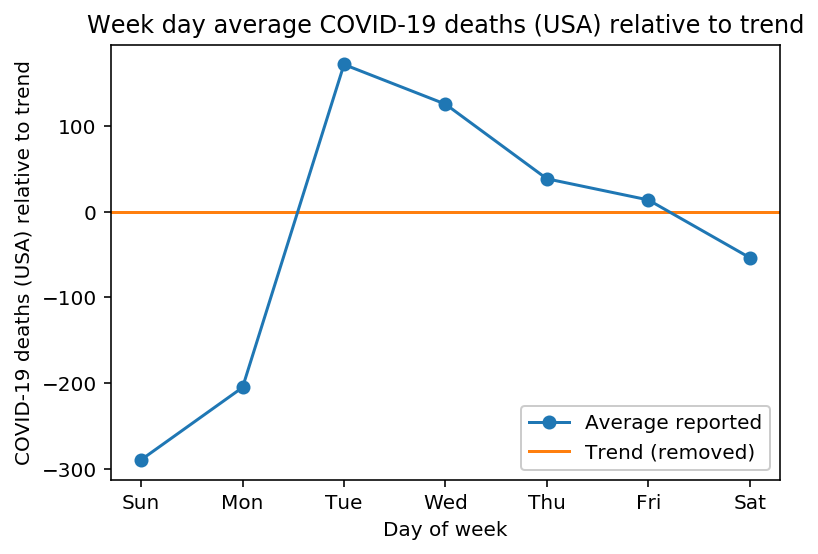

In [172]:
death_smooth = plt.axhline(y=0, color='C1', label='Trend (removed)')
death_counts, = plt.plot(week_diffs, 'o-', color='C0', label='Average reported')

locs, labels = plt.xticks()
locs = locs[1:-1]
labels = [weekday[:3] for weekday in week]
_ = plt.xticks(locs, labels)

_ = plt.legend(handles=[death_counts, death_smooth],
               loc='lower right', framealpha=1)

_ = plt.xlabel('Day of week')
_ = plt.ylabel('COVID-19 deaths (USA) relative to trend')
_ = plt.title('Week day average COVID-19 deaths (USA) relative to trend')
plt.savefig('week_day_residuals.png', facecolor='w', transparent=False, dpi=300)